#Document Retrieval using Computer Vison

Inspired by the paper https://arxiv.org/abs/2407.01449

### Step 1: Install Required Libraries

In [1]:
!pip install uv
!uv pip install --system colpali_engine>=0.3.1 datasets huggingface_hub[hf_transfer] qdrant-client transformers>=4.45.0 stamina rich

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 22.8 MB/s eta 0:00:00
Using Python 3.10.12 environment at /usr
Resolved 73 packages in 2.02s
Building gputil==1.4.0
Building gputil==1.4.0
Building gputil==1.4.0
⠙ Preparing packages... (0/18)
Building gputil==1.4.0
⠙ Preparing packages... (0/18)
Building gputil==1.4.0
⠙ Preparing packages... (0/18)
hyperframe ------------------------------     0 B/12.10 KiB
Building gputil==1.4.0
⠙ Preparing packages... (0/18)
hyperframe ------------------------------ 12.10 KiB/12.10 KiB
Building gputil==1.4.0
⠙ Preparing packages... (0/18)
Building gputil==1.4.0
⠙ Preparing packages... (0/18)
portalocker ------------------------------ 14.91 KiB/17.99 KiB
Building gputil==1.4.0
⠙ Preparing packages... (0/18)
portalocker ------------------------------ 14.91 KiB/17.99 KiB
Building gputil==1.4.0
⠙ Preparing packages... (0/18)
portalocker ------------------------------ 14.91 KiB/17.99 KiB
Building gputil==1.4.0
⠙ Preparing packages... (0/18)
portalo

In [2]:
import os
import torch
import time
import numpy as np
from qdrant_client import QdrantClient
from qdrant_client.http import models
from tqdm import tqdm
from datasets import load_dataset

## Step 2: Downloading the Statista Dataset from Hugging Face

In [12]:
os.environ["HF_HUB_ENABLE_HF_TRANSFER"] = "1" # optional setting for faster dataset downloads

In [13]:
dataset = load_dataset("Pran10/Statista", split="train")

README.md:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/250 [00:00<?, ?it/s]

(…)ry-zomato-users-in-india.pdf_page_14.jpg:   0%|          | 0.00/63.9k [00:00<?, ?B/s]

(…)ry-zomato-users-in-india.pdf_page_16.jpg:   0%|          | 0.00/65.0k [00:00<?, ?B/s]

(…)ry-zomato-users-in-india.pdf_page_13.jpg:   0%|          | 0.00/66.6k [00:00<?, ?B/s]

(…)ry-zomato-users-in-india.pdf_page_10.jpg:   0%|          | 0.00/56.3k [00:00<?, ?B/s]

(…)ry-zomato-users-in-india.pdf_page_19.jpg:   0%|          | 0.00/55.9k [00:00<?, ?B/s]

(…)am-afc-turnover-2020-2022.pdf_page_1.jpg:   0%|          | 0.00/43.7k [00:00<?, ?B/s]

(…)ry-zomato-users-in-india.pdf_page_11.jpg:   0%|          | 0.00/67.6k [00:00<?, ?B/s]

(…)ry-zomato-users-in-india.pdf_page_18.jpg:   0%|          | 0.00/57.8k [00:00<?, ?B/s]

(…)ry-zomato-users-in-india.pdf_page_17.jpg:   0%|          | 0.00/61.7k [00:00<?, ?B/s]

(…)ts-empires-worldwide-2023.pdf_page_1.jpg:   0%|          | 0.00/123k [00:00<?, ?B/s]

(…)ry-zomato-users-in-india.pdf_page_15.jpg:   0%|          | 0.00/61.9k [00:00<?, ?B/s]

F1_-_2021_Fact_Sheet.pdf_page_1.jpg:   0%|          | 0.00/104k [00:00<?, ?B/s]

(…)m-afc-2018-2023-by-season.pdf_page_1.jpg:   0%|          | 0.00/51.6k [00:00<?, ?B/s]

(…)ry-zomato-users-in-india.pdf_page_12.jpg:   0%|          | 0.00/74.0k [00:00<?, ?B/s]

(…)-_2021_Digital_Fact_Sheet.pdf_page_1.jpg:   0%|          | 0.00/106k [00:00<?, ?B/s]

(…)ry-zomato-users-in-india.pdf_page_20.jpg:   0%|          | 0.00/32.4k [00:00<?, ?B/s]

(…)ry-zomato-users-in-india.pdf_page_22.jpg:   0%|          | 0.00/64.9k [00:00<?, ?B/s]

(…)ery-zomato-users-in-india.pdf_page_2.jpg:   0%|          | 0.00/105k [00:00<?, ?B/s]

(…)ry-zomato-users-in-india.pdf_page_28.jpg:   0%|          | 0.00/69.1k [00:00<?, ?B/s]

(…)ry-zomato-users-in-india.pdf_page_24.jpg:   0%|          | 0.00/60.5k [00:00<?, ?B/s]

(…)ry-zomato-users-in-india.pdf_page_27.jpg:   0%|          | 0.00/69.9k [00:00<?, ?B/s]

(…)ry-zomato-users-in-india.pdf_page_25.jpg:   0%|          | 0.00/45.3k [00:00<?, ?B/s]

(…)ry-zomato-users-in-india.pdf_page_26.jpg:   0%|          | 0.00/61.9k [00:00<?, ?B/s]

(…)ry-zomato-users-in-india.pdf_page_29.jpg:   0%|          | 0.00/71.6k [00:00<?, ?B/s]

(…)ry-zomato-users-in-india.pdf_page_21.jpg:   0%|          | 0.00/73.7k [00:00<?, ?B/s]

(…)ery-zomato-users-in-india.pdf_page_1.jpg:   0%|          | 0.00/45.2k [00:00<?, ?B/s]

(…)ry-zomato-users-in-india.pdf_page_30.jpg:   0%|          | 0.00/88.8k [00:00<?, ?B/s]

(…)ery-zomato-users-in-india.pdf_page_3.jpg:   0%|          | 0.00/36.1k [00:00<?, ?B/s]

(…)ery-zomato-users-in-india.pdf_page_4.jpg:   0%|          | 0.00/62.4k [00:00<?, ?B/s]

(…)ry-zomato-users-in-india.pdf_page_31.jpg:   0%|          | 0.00/67.1k [00:00<?, ?B/s]

(…)ry-zomato-users-in-india.pdf_page_32.jpg:   0%|          | 0.00/81.3k [00:00<?, ?B/s]

(…)ery-zomato-users-in-india.pdf_page_6.jpg:   0%|          | 0.00/84.6k [00:00<?, ?B/s]

(…)ery-zomato-users-in-india.pdf_page_7.jpg:   0%|          | 0.00/60.3k [00:00<?, ?B/s]

(…)ery-zomato-users-in-india.pdf_page_8.jpg:   0%|          | 0.00/46.3k [00:00<?, ?B/s]

(…)ery-zomato-users-in-india.pdf_page_9.jpg:   0%|          | 0.00/66.5k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_12.jpg:   0%|          | 0.00/73.7k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_13.jpg:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_15.jpg:   0%|          | 0.00/63.0k [00:00<?, ?B/s]

(…)_netflix-statista-dossier.pdf_page_1.jpg:   0%|          | 0.00/14.1k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_16.jpg:   0%|          | 0.00/99.3k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_14.jpg:   0%|          | 0.00/59.1k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_11.jpg:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

(…)ery-zomato-users-in-india.pdf_page_5.jpg:   0%|          | 0.00/73.0k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_10.jpg:   0%|          | 0.00/76.0k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_20.jpg:   0%|          | 0.00/11.8k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_18.jpg:   0%|          | 0.00/52.4k [00:00<?, ?B/s]

(…)_netflix-statista-dossier.pdf_page_2.jpg:   0%|          | 0.00/53.6k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_17.jpg:   0%|          | 0.00/94.2k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_19.jpg:   0%|          | 0.00/53.5k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_21.jpg:   0%|          | 0.00/72.2k [00:00<?, ?B/s]

(…)_netflix-statista-dossier.pdf_page_3.jpg:   0%|          | 0.00/26.3k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_23.jpg:   0%|          | 0.00/50.8k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_24.jpg:   0%|          | 0.00/56.8k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_29.jpg:   0%|          | 0.00/61.2k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_22.jpg:   0%|          | 0.00/59.7k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_25.jpg:   0%|          | 0.00/12.1k [00:00<?, ?B/s]

(…)ry-zomato-users-in-india.pdf_page_23.jpg:   0%|          | 0.00/67.7k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_28.jpg:   0%|          | 0.00/66.8k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_26.jpg:   0%|          | 0.00/93.3k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_33.jpg:   0%|          | 0.00/67.9k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_34.jpg:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_30.jpg:   0%|          | 0.00/71.4k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_27.jpg:   0%|          | 0.00/80.9k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_31.jpg:   0%|          | 0.00/64.4k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_32.jpg:   0%|          | 0.00/71.1k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_37.jpg:   0%|          | 0.00/63.7k [00:00<?, ?B/s]

(…)_netflix-statista-dossier.pdf_page_4.jpg:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_39.jpg:   0%|          | 0.00/79.5k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_41.jpg:   0%|          | 0.00/60.0k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_40.jpg:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_35.jpg:   0%|          | 0.00/72.0k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_42.jpg:   0%|          | 0.00/86.2k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_38.jpg:   0%|          | 0.00/59.7k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_47.jpg:   0%|          | 0.00/64.6k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_46.jpg:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_45.jpg:   0%|          | 0.00/69.5k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_48.jpg:   0%|          | 0.00/61.3k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_43.jpg:   0%|          | 0.00/77.9k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_36.jpg:   0%|          | 0.00/62.5k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_44.jpg:   0%|          | 0.00/73.5k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_49.jpg:   0%|          | 0.00/51.4k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_13.jpg:   0%|          | 0.00/64.7k [00:00<?, ?B/s]

(…)_netflix-statista-dossier.pdf_page_6.jpg:   0%|          | 0.00/75.2k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_52.jpg:   0%|          | 0.00/27.4k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_12.jpg:   0%|          | 0.00/52.9k [00:00<?, ?B/s]

(…)s-brands-statista-dossier.pdf_page_1.jpg:   0%|          | 0.00/16.4k [00:00<?, ?B/s]

(…)_netflix-statista-dossier.pdf_page_7.jpg:   0%|          | 0.00/60.1k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_51.jpg:   0%|          | 0.00/78.6k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_10.jpg:   0%|          | 0.00/66.1k [00:00<?, ?B/s]

(…)_netflix-statista-dossier.pdf_page_5.jpg:   0%|          | 0.00/66.7k [00:00<?, ?B/s]

(…)_netflix-statista-dossier.pdf_page_8.jpg:   0%|          | 0.00/59.2k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_14.jpg:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_11.jpg:   0%|          | 0.00/89.3k [00:00<?, ?B/s]

(…)_netflix-statista-dossier.pdf_page_9.jpg:   0%|          | 0.00/76.6k [00:00<?, ?B/s]

(…)netflix-statista-dossier.pdf_page_50.jpg:   0%|          | 0.00/56.1k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_16.jpg:   0%|          | 0.00/59.9k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_15.jpg:   0%|          | 0.00/65.6k [00:00<?, ?B/s]

(…)s-brands-statista-dossier.pdf_page_2.jpg:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_27.jpg:   0%|          | 0.00/65.9k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_24.jpg:   0%|          | 0.00/75.4k [00:00<?, ?B/s]

(…)s-brands-statista-dossier.pdf_page_3.jpg:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_30.jpg:   0%|          | 0.00/62.5k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_18.jpg:   0%|          | 0.00/75.3k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_22.jpg:   0%|          | 0.00/73.5k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_23.jpg:   0%|          | 0.00/76.5k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_26.jpg:   0%|          | 0.00/80.1k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_31.jpg:   0%|          | 0.00/64.1k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_32.jpg:   0%|          | 0.00/66.8k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_39.jpg:   0%|          | 0.00/79.8k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_37.jpg:   0%|          | 0.00/84.4k [00:00<?, ?B/s]

(…)s-brands-statista-dossier.pdf_page_4.jpg:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_38.jpg:   0%|          | 0.00/74.3k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_34.jpg:   0%|          | 0.00/54.8k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_41.jpg:   0%|          | 0.00/59.2k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_42.jpg:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_44.jpg:   0%|          | 0.00/72.5k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_43.jpg:   0%|          | 0.00/69.8k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_45.jpg:   0%|          | 0.00/62.0k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_33.jpg:   0%|          | 0.00/14.9k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_17.jpg:   0%|          | 0.00/70.2k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_19.jpg:   0%|          | 0.00/99.5k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_40.jpg:   0%|          | 0.00/12.0k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_20.jpg:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_25.jpg:   0%|          | 0.00/69.8k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_36.jpg:   0%|          | 0.00/80.1k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_28.jpg:   0%|          | 0.00/64.4k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_46.jpg:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_35.jpg:   0%|          | 0.00/78.1k [00:00<?, ?B/s]

(…)s-brands-statista-dossier.pdf_page_7.jpg:   0%|          | 0.00/73.5k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_29.jpg:   0%|          | 0.00/63.5k [00:00<?, ?B/s]

(…)s-brands-statista-dossier.pdf_page_8.jpg:   0%|          | 0.00/77.1k [00:00<?, ?B/s]

(…)s-brands-statista-dossier.pdf_page_5.jpg:   0%|          | 0.00/60.6k [00:00<?, ?B/s]

(…)s-brands-statista-dossier.pdf_page_6.jpg:   0%|          | 0.00/76.6k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_1.jpg:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_14.jpg:   0%|          | 0.00/60.8k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_17.jpg:   0%|          | 0.00/67.5k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_15.jpg:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_16.jpg:   0%|          | 0.00/60.1k [00:00<?, ?B/s]

(…)s-brands-statista-dossier.pdf_page_9.jpg:   0%|          | 0.00/75.0k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_11.jpg:   0%|          | 0.00/56.7k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_13.jpg:   0%|          | 0.00/59.5k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_19.jpg:   0%|          | 0.00/60.4k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_12.jpg:   0%|          | 0.00/62.5k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_10.jpg:   0%|          | 0.00/60.9k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_2.jpg:   0%|          | 0.00/44.2k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_20.jpg:   0%|          | 0.00/65.5k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_21.jpg:   0%|          | 0.00/73.4k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_18.jpg:   0%|          | 0.00/71.2k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_22.jpg:   0%|          | 0.00/63.5k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_24.jpg:   0%|          | 0.00/71.0k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_23.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_30.jpg:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_27.jpg:   0%|          | 0.00/48.2k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_26.jpg:   0%|          | 0.00/67.0k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_4.jpg:   0%|          | 0.00/47.6k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_3.jpg:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_28.jpg:   0%|          | 0.00/33.9k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_25.jpg:   0%|          | 0.00/75.4k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_29.jpg:   0%|          | 0.00/57.3k [00:00<?, ?B/s]

(…)_id38346_video-on-demand.pdf_page_10.jpg:   0%|          | 0.00/47.5k [00:00<?, ?B/s]

(…)-brands-statista-dossier.pdf_page_21.jpg:   0%|          | 0.00/76.0k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_8.jpg:   0%|          | 0.00/59.9k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_5.jpg:   0%|          | 0.00/55.9k [00:00<?, ?B/s]

(…)y_id38346_video-on-demand.pdf_page_1.jpg:   0%|          | 0.00/47.5k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_9.jpg:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_6.jpg:   0%|          | 0.00/83.3k [00:00<?, ?B/s]

study_id25545_formula-1.pdf_page_7.jpg:   0%|          | 0.00/62.8k [00:00<?, ?B/s]

(…)_id38346_video-on-demand.pdf_page_11.jpg:   0%|          | 0.00/57.1k [00:00<?, ?B/s]

(…)_id38346_video-on-demand.pdf_page_13.jpg:   0%|          | 0.00/63.8k [00:00<?, ?B/s]

(…)_id38346_video-on-demand.pdf_page_16.jpg:   0%|          | 0.00/57.6k [00:00<?, ?B/s]

(…)_id38346_video-on-demand.pdf_page_15.jpg:   0%|          | 0.00/56.3k [00:00<?, ?B/s]

(…)_id38346_video-on-demand.pdf_page_12.jpg:   0%|          | 0.00/57.3k [00:00<?, ?B/s]

(…)_id38346_video-on-demand.pdf_page_17.jpg:   0%|          | 0.00/48.1k [00:00<?, ?B/s]

(…)_id38346_video-on-demand.pdf_page_18.jpg:   0%|          | 0.00/33.3k [00:00<?, ?B/s]

(…)_id38346_video-on-demand.pdf_page_22.jpg:   0%|          | 0.00/56.3k [00:00<?, ?B/s]

(…)_id38346_video-on-demand.pdf_page_19.jpg:   0%|          | 0.00/57.1k [00:00<?, ?B/s]

(…)_id38346_video-on-demand.pdf_page_20.jpg:   0%|          | 0.00/62.0k [00:00<?, ?B/s]

(…)y_id38346_video-on-demand.pdf_page_2.jpg:   0%|          | 0.00/26.1k [00:00<?, ?B/s]

(…)_id38346_video-on-demand.pdf_page_23.jpg:   0%|          | 0.00/101k [00:00<?, ?B/s]

(…)_id38346_video-on-demand.pdf_page_24.jpg:   0%|          | 0.00/50.4k [00:00<?, ?B/s]

(…)_id38346_video-on-demand.pdf_page_25.jpg:   0%|          | 0.00/71.4k [00:00<?, ?B/s]

(…)_id38346_video-on-demand.pdf_page_21.jpg:   0%|          | 0.00/98.4k [00:00<?, ?B/s]

(…)y_id38346_video-on-demand.pdf_page_7.jpg:   0%|          | 0.00/66.9k [00:00<?, ?B/s]

(…)_id38346_video-on-demand.pdf_page_26.jpg:   0%|          | 0.00/32.3k [00:00<?, ?B/s]

(…)y_id38346_video-on-demand.pdf_page_3.jpg:   0%|          | 0.00/70.0k [00:00<?, ?B/s]

(…)y_id38346_video-on-demand.pdf_page_6.jpg:   0%|          | 0.00/84.1k [00:00<?, ?B/s]

(…)y_id38346_video-on-demand.pdf_page_4.jpg:   0%|          | 0.00/35.6k [00:00<?, ?B/s]

(…)y_id38346_video-on-demand.pdf_page_5.jpg:   0%|          | 0.00/118k [00:00<?, ?B/s]

(…)y_id38346_video-on-demand.pdf_page_8.jpg:   0%|          | 0.00/67.9k [00:00<?, ?B/s]

(…)market-data-and-analysis.pdf_page_11.jpg:   0%|          | 0.00/48.2k [00:00<?, ?B/s]

(…)market-data-and-analysis.pdf_page_13.jpg:   0%|          | 0.00/49.0k [00:00<?, ?B/s]

(…)market-data-and-analysis.pdf_page_10.jpg:   0%|          | 0.00/46.7k [00:00<?, ?B/s]

(…)market-data-and-analysis.pdf_page_15.jpg:   0%|          | 0.00/35.6k [00:00<?, ?B/s]

(…)market-data-and-analysis.pdf_page_12.jpg:   0%|          | 0.00/48.7k [00:00<?, ?B/s]

(…)-market-data-and-analysis.pdf_page_1.jpg:   0%|          | 0.00/41.3k [00:00<?, ?B/s]

(…)market-data-and-analysis.pdf_page_14.jpg:   0%|          | 0.00/52.4k [00:00<?, ?B/s]

(…)y_id38346_video-on-demand.pdf_page_9.jpg:   0%|          | 0.00/45.3k [00:00<?, ?B/s]

(…)market-data-and-analysis.pdf_page_17.jpg:   0%|          | 0.00/45.1k [00:00<?, ?B/s]

(…)market-data-and-analysis.pdf_page_20.jpg:   0%|          | 0.00/64.6k [00:00<?, ?B/s]

(…)market-data-and-analysis.pdf_page_19.jpg:   0%|          | 0.00/37.3k [00:00<?, ?B/s]

(…)-market-data-and-analysis.pdf_page_2.jpg:   0%|          | 0.00/27.0k [00:00<?, ?B/s]

(…)market-data-and-analysis.pdf_page_18.jpg:   0%|          | 0.00/47.0k [00:00<?, ?B/s]

(…)market-data-and-analysis.pdf_page_16.jpg:   0%|          | 0.00/45.3k [00:00<?, ?B/s]

(…)market-data-and-analysis.pdf_page_21.jpg:   0%|          | 0.00/64.5k [00:00<?, ?B/s]

(…)market-data-and-analysis.pdf_page_26.jpg:   0%|          | 0.00/52.6k [00:00<?, ?B/s]

(…)market-data-and-analysis.pdf_page_29.jpg:   0%|          | 0.00/71.4k [00:00<?, ?B/s]

(…)market-data-and-analysis.pdf_page_25.jpg:   0%|          | 0.00/28.7k [00:00<?, ?B/s]

(…)market-data-and-analysis.pdf_page_22.jpg:   0%|          | 0.00/35.7k [00:00<?, ?B/s]

(…)market-data-and-analysis.pdf_page_24.jpg:   0%|          | 0.00/58.7k [00:00<?, ?B/s]

(…)market-data-and-analysis.pdf_page_28.jpg:   0%|          | 0.00/60.1k [00:00<?, ?B/s]

(…)market-data-and-analysis.pdf_page_27.jpg:   0%|          | 0.00/52.1k [00:00<?, ?B/s]

(…)market-data-and-analysis.pdf_page_23.jpg:   0%|          | 0.00/56.2k [00:00<?, ?B/s]

(…)_id38346_video-on-demand.pdf_page_14.jpg:   0%|          | 0.00/58.6k [00:00<?, ?B/s]

(…)-market-data-and-analysis.pdf_page_7.jpg:   0%|          | 0.00/68.2k [00:00<?, ?B/s]

(…)-market-data-and-analysis.pdf_page_6.jpg:   0%|          | 0.00/67.3k [00:00<?, ?B/s]

(…)-market-data-and-analysis.pdf_page_5.jpg:   0%|          | 0.00/56.1k [00:00<?, ?B/s]

(…)-market-data-and-analysis.pdf_page_8.jpg:   0%|          | 0.00/37.4k [00:00<?, ?B/s]

(…)-market-data-and-analysis.pdf_page_4.jpg:   0%|          | 0.00/43.1k [00:00<?, ?B/s]

(…)market-data-and-analysis.pdf_page_30.jpg:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

(…)-market-data-and-analysis.pdf_page_9.jpg:   0%|          | 0.00/45.8k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_15.jpg:   0%|          | 0.00/66.2k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_11.jpg:   0%|          | 0.00/65.0k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_1.jpg:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_12.jpg:   0%|          | 0.00/70.6k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_14.jpg:   0%|          | 0.00/16.7k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_13.jpg:   0%|          | 0.00/52.2k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_10.jpg:   0%|          | 0.00/77.8k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_16.jpg:   0%|          | 0.00/56.6k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_18.jpg:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_22.jpg:   0%|          | 0.00/100k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_21.jpg:   0%|          | 0.00/79.5k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_17.jpg:   0%|          | 0.00/51.9k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_20.jpg:   0%|          | 0.00/82.5k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_2.jpg:   0%|          | 0.00/42.1k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_19.jpg:   0%|          | 0.00/12.0k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_23.jpg:   0%|          | 0.00/14.8k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_28.jpg:   0%|          | 0.00/63.6k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_25.jpg:   0%|          | 0.00/54.9k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_24.jpg:   0%|          | 0.00/63.9k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_29.jpg:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_27.jpg:   0%|          | 0.00/73.3k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_4.jpg:   0%|          | 0.00/52.4k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_26.jpg:   0%|          | 0.00/68.6k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_7.jpg:   0%|          | 0.00/66.2k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_6.jpg:   0%|          | 0.00/53.3k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_5.jpg:   0%|          | 0.00/59.9k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_8.jpg:   0%|          | 0.00/41.5k [00:00<?, ?B/s]

study_id75195_tata-group.pdf_page_9.jpg:   0%|          | 0.00/11.9k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/250 [00:00<?, ? examples/s]

In [ ]:
dataset # structure of the dataset

In [ ]:
#Let's take a look at one random document from the dataset to exemplify the complexity of the data that we'll be handling

dataset[1]['image']

## Step 3: Connecting to Vector DB

In [3]:
from google.colab import userdata

In [4]:
qdrant_client = QdrantClient(
    url="https://b7f2bbe1-4dd5-4d6c-b54d-92099eb20911.us-east4-0.gcp.cloud.qdrant.io:6333",
    api_key='-Jcs--xT-aKucHpIxfpqG3-Ck4pD6D9n5N2lDCknMPphSERcfU8QkA',
)

## Step 4: Setting Up ColPali

We're going to be using here a ColPali model finetuned by Davan

In [5]:
from colpali_engine.models import ColPali, ColPaliProcessor

# Initialize ColPali model and processor
model_name = (
    "davanstrien/finetune_colpali_v1_2-ufo-4bit"  # Use the latest version available
)
colpali_model = ColPali.from_pretrained(
    model_name,
    torch_dtype=torch.bfloat16,
    device_map="cuda:0",  # Use "cuda:0" for GPU, "cpu" for CPU, or "mps" for Apple Silicon
)
colpali_processor = ColPaliProcessor.from_pretrained(
    "vidore/colpaligemma-3b-pt-448-base"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


adapter_config.json:   0%|          | 0.00/750 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/862M [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/157M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/425 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/243k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

## Step 5: Configure your Qdrant Collection

Now let's create a collection in Qdrant. We're using binary quantization here, keeping only the quantized vectors in RAM while storing the original vectors and payloads on disk. MaxSim is being used for selecting the maximum similarity score for token-level comparisons between query and document vectors

In [6]:
collection_name = "Statista"

In [ ]:
qdrant_client.create_collection(
    collection_name=collection_name,
    on_disk_payload=True,  # store the payload on disk
    vectors_config=models.VectorParams(
        size=128,
        distance=models.Distance.COSINE,
        on_disk=True, # move original vectors to disk
        multivector_config=models.MultiVectorConfig(
            comparator=models.MultiVectorComparator.MAX_SIM
        ),
        quantization_config=models.BinaryQuantization(
        binary=models.BinaryQuantizationConfig(
            always_ram=True  # keep only quantized vectors in RAM
            ),
        ),
    ),
)

## Step 6: Uploading the vectors to Qdrant

In this step, we're indexing the vectors into our Qdrant Collection in batches.

For each batch, the images are processed and encoded using the ColPali model, turning them into multi-vector embeddings. These embeddings are then converted from tensors into lists of vectors, capturing key details from each image and creating a multi-vector representation for each document. This setup works well with Qdrant's multivector capabilities.

In [ ]:
import stamina


@stamina.retry(on=Exception, attempts=3) # retry mechanism if an exception occurs during the operation
def upsert_to_qdrant(batch):
    try:
        qdrant_client.upsert(
            collection_name=collection_name,
            points=points,
            wait=False,
        )
    except Exception as e:
        print(f"Error during upsert: {e}")
        return False
    return True

In [ ]:
batch_size = 2  # Adjust based on your GPU memory constraints

# Use tqdm to create a progress bar
with tqdm(total=len(dataset), desc="Indexing Progress") as pbar:
    for i in range(0, len(dataset), batch_size):
        batch = dataset[i : i + batch_size]

        # The images are already PIL Image objects, so we can use them directly
        images = batch["image"]

        # Process and encode images
        with torch.no_grad():
            batch_images = colpali_processor.process_images(images).to(
                colpali_model.device
            )
            image_embeddings = colpali_model(**batch_images)

        # Prepare points for Qdrant
        points = []
        for j, embedding in enumerate(image_embeddings):
            # Convert the embedding to a list of vectors
            multivector = embedding.cpu().float().numpy().tolist()
            points.append(
                models.PointStruct(
                    id=i + j,  # we just use the index as the ID
                    vector=multivector,  # This is now a list of vectors
                    payload={
                        "source": "internet archive"
                    },  # can also add other metadata/data
                )
            )

        # Upload points to Qdrant
        try:
            upsert_to_qdrant(points)
        except Exception as e:
            print(f"Error during upsert: {e}")
            continue

        # Update the progress bar
        pbar.update(batch_size)

print("Indexing complete!")

Indexing Progress: 100%|██████████| 250/250 [14:03<00:00,  3.37s/it]

Indexing complete!


In [7]:
qdrant_client.update_collection(
    collection_name=collection_name,
    optimizer_config=models.OptimizersConfigDiff(indexing_threshold=10),
)

True

## Step 7a: Processing the Query : How much revenue did Tata group make in 2022?



In [46]:
query_text = "How much revenue did tata make in 2022"
with torch.no_grad():
    batch_query = colpali_processor.process_queries([query_text]).to(
        colpali_model.device
    )
    query_embedding = colpali_model(**batch_query)

# After generating the query embedding tensor, we need to convert it into a multivector that can be used by Qdrant for searching

multivector_query = query_embedding[0].cpu().float().numpy().tolist()

## Step 7b: Processing the Query : How many people viewed F1 on TV in 2021?




In [49]:
query_text = "How many people viewed F1 on TV in 2021"
with torch.no_grad():
    batch_query = colpali_processor.process_queries([query_text]).to(
        colpali_model.device
    )
    query_embedding = colpali_model(**batch_query)

# After generating the query embedding tensor, we need to convert it into a multivector that can be used by Qdrant for searching

multivector_query = query_embedding[0].cpu().float().numpy().tolist()

## Step 8: Searching and Retrieving the Documents


In [50]:
search_result = qdrant_client.query_points(
    collection_name=collection_name,
    query=multivector_query,
    limit=10,
    timeout=100,
    search_params=models.SearchParams(
        quantization=models.QuantizationSearchParams(
            ignore=False,
            rescore=True,
            oversampling=2.0,
        )
    )
)

# Search in vectordb
search_result.points


[ScoredPoint(id=151, version=75, score=19.116724, payload={'source': 'internet archive'}, vector=None, shard_key=None, order_value=None),
 ScoredPoint(id=0, version=0, score=18.881695, payload={'source': 'internet archive'}, vector=None, shard_key=None, order_value=None),
 ScoredPoint(id=153, version=76, score=18.849407, payload={'source': 'internet archive'}, vector=None, shard_key=None, order_value=None),
 ScoredPoint(id=1, version=0, score=18.178558, payload={'source': 'internet archive'}, vector=None, shard_key=None, order_value=None),
 ScoredPoint(id=146, version=73, score=17.9115, payload={'source': 'internet archive'}, vector=None, shard_key=None, order_value=None),
 ScoredPoint(id=28, version=14, score=15.313347, payload={'source': 'internet archive'}, vector=None, shard_key=None, order_value=None),
 ScoredPoint(id=40, version=20, score=14.460729, payload={'source': 'internet archive'}, vector=None, shard_key=None, order_value=None),
 ScoredPoint(id=96, version=48, score=14.371

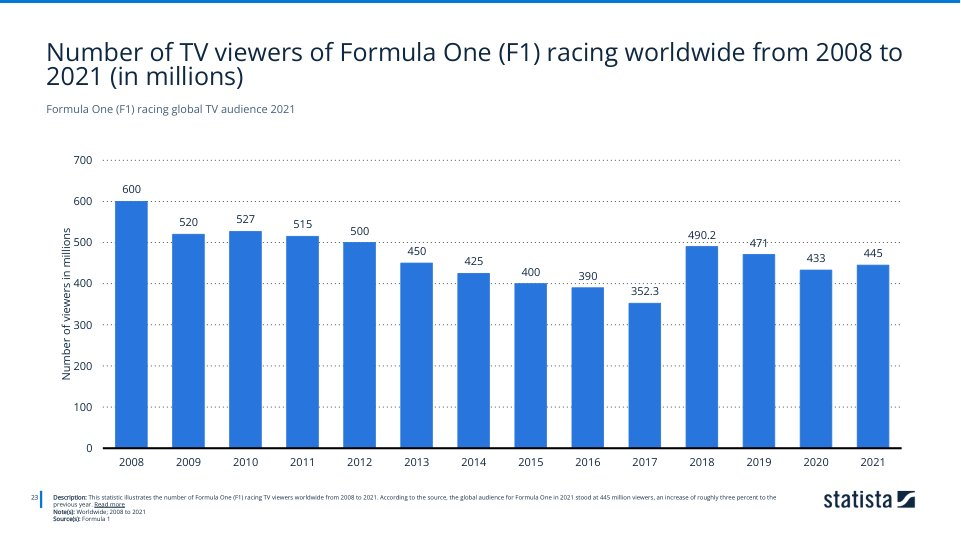

In [51]:
idx = search_result.points[0].id
dataset[idx]["image"]